In [1]:
from scipy.stats import norm, gaussian_kde
# from resources.CSI_functions import CSI_functions as CSI
# from resources.OHLC_Local import OHLC_Local as finance
from yahoo_fin import stock_info
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# csi = CSI('20141001', '20210301', qqe_period = 15, qqe_sf = 15).calc_csi(include_percentile = True, include_quadrant_id = True).where(lambda x: x['quadrant'] != 0).dropna()
# spy = finance.get_data('SPY', '20150101', '20210301', include_returns = True)['next_day_close'].dropna()
# csi['1_day'] = spy
# csi['5_day'] = spy.rolling(5).sum().shift(-4).dropna()
# csi = csi.dropna()
# csi.to_csv('sample_csi_and_returns_data.csv')

In [3]:
csi = pd.read_csv('sample_csi_and_returns_data.csv')
csi['date'] = pd.to_datetime(csi['date'])
csi.set_index('date', inplace = True)

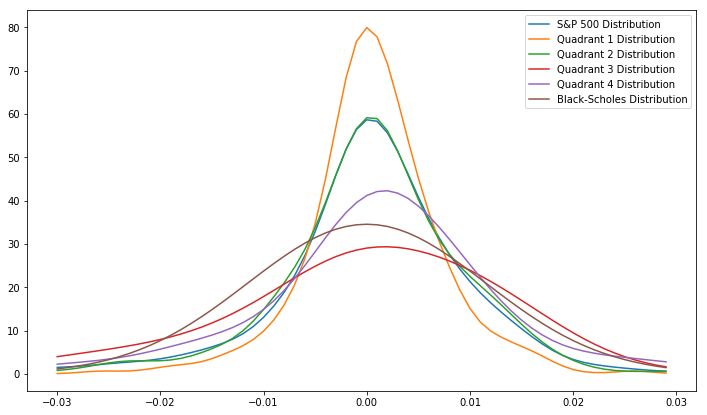

In [4]:
returns_col = '1_day'

quadrant1 = csi.where(lambda x:  (x['quadrant'] == 'Q1')).dropna()[returns_col] 
quadrant2 = csi.where(lambda x:  (x['quadrant'] == 'Q2')).dropna()[returns_col] 
quadrant3 = csi.where(lambda x:  (x['quadrant'] == 'Q3')).dropna()[returns_col] 
quadrant4 = csi.where(lambda x:  (x['quadrant'] == 'Q4')).dropna()[returns_col] 
all_time_mean = csi[returns_col].mean()
all_time_std = csi[returns_col].std()



X = np.arange(-.03, .03, .001)
sp500 = gaussian_kde(csi[returns_col].values)
q1 = gaussian_kde(quadrant1.values)
q2 = gaussian_kde(quadrant2.values)
q3 = gaussian_kde(quadrant3.values)
q4 = gaussian_kde(quadrant4.values)


plt.plot(X, sp500(X), label = 'S&P 500 Distribution')
plt.plot(X, q1(X), label = 'Quadrant 1 Distribution')
plt.plot(X, q2(X), label = 'Quadrant 2 Distribution')
plt.plot(X, q3(X), label = 'Quadrant 3 Distribution')
plt.plot(X, q4(X), label = 'Quadrant 4 Distribution')
plt.plot(X, norm(0, all_time_std).pdf(X), label = 'Black-Scholes Distribution')
plt.gcf().set_size_inches(12, 7)
plt.legend()

In [5]:
# Compile dataframe to upload to table 
df_results = pd.DataFrame()
for func in [sp500, q1, q2, q3, q4]:
    temp = pd.DataFrame(zip([round(x, 3) for x in X], [func(x)[0] for x in X]), columns = ['x_value', 'dist']).set_index('x_value')
    df_results = pd.concat([df_results, temp], axis = 1)
    
# Finally, include the standard normal distribution to the df 
standard_normal = pd.DataFrame(norm(0, all_time_std).pdf(X), index = df_results.index, columns = ['dist'])
df_results = pd.concat([df_results, standard_normal], axis = 1)

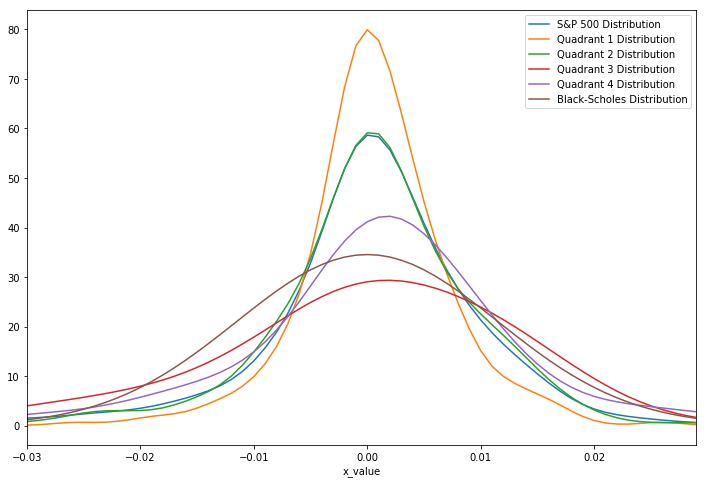

In [6]:
df_results.columns = ['S&P 500 Distribution', 'Quadrant 1 Distribution', 'Quadrant 2 Distribution', 'Quadrant 3 Distribution', 'Quadrant 4 Distribution', 'Black-Scholes Distribution']
df_results.plot(figsize = (12, 8))

In [7]:
df_results

,S&P 500 Distribution,Quadrant 1 Distribution,Quadrant 2 Distribution,Quadrant 3 Distribution,Quadrant 4 Distribution,Black-Scholes Distribution
x_value,,,,,,
-0.030,1.523961,0.114151,0.828729,3.998373,2.267879,1.182632
-0.029,1.638605,0.202886,1.049456,4.337349,2.478126,1.475453
-0.028,1.775495,0.364795,1.357907,4.678086,2.686201,1.827025
-0.027,1.952663,0.543461,1.743956,5.021841,2.905651,2.245468
-0.026,2.163639,0.662783,2.167164,5.371818,3.152533,2.739128
-0.025,2.381851,0.687814,2.560228,5.732977,3.442376,3.316355
-0.024,2.582850,0.670270,2.853865,6.111773,3.787196,3.985225
-0.023,2.765814,0.714846,3.010702,6.515867,4.193218,4.753220
-0.022,2.957332,0.893676,3.047233,6.953848,4.659867,5.626860
